# Importando as bibliotecas

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd 
import numpy as np

# Conhecendo / Raspando - Glassdoor

In [2]:
# testando com a raspagem na olx pesquisando iphone
url = 'https://www.glassdoor.com.br/Sal%C3%A1rios/analista-de-dados-sal%C3%A1rio-SRCH_KO0,17.htm'

# Descubro isso no google digitando: 'my user agent' (meu headers - cada pc vai ter o seu)
meu_headers = {'user-agent': 'Mozilla/5.0'}


In [3]:
site = requests.get(url, headers=meu_headers) #ao pedir um print(url.txt) - verifico todas a pag
soup = BeautifulSoup(site.content, 'html.parser') #- estando toda a pagina ok faço o soup e tenho acesso as tags, etc... 
#print(soup)  
# reponse - 200 - OK

In [4]:
soup_macarroni = site.text # pode printar depois essa variavel para ver a estrutura do html

In [5]:
sopa_bonita = BeautifulSoup(soup_macarroni, 'html.parser')
print(sopa_bonita)

<!DOCTYPE html>
<html lang="pt" style="height: 100%;" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/"><head><link href="/salaries/static/gd-salary-srch.bundle.css?v=2fc68eaaf9b28272041d" media="all" rel="stylesheet"/><link href="/salaries/static/gd-vendor.bundle.css?v=2fc68eaaf9b28272041d" media="all" rel="stylesheet"/><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="#0caa41" name="theme-color"/><meta content="#0caa41" name="msapplication-navbutton-color"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="#0caa41" name="apple-mobile-web-app-status-bar-style"/><meta content="no-cache,must-revalidate" http-equiv="Cache-Control"/><meta content="no-cache" http-equiv="Pragma"/><meta content="0" http-equiv="Expires"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><link href="/manifest.json" rel="manifest"/><link href="/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon

In [6]:
lista_empresas = sopa_bonita.find_all('h3', {'data-test': re.compile('salaries-list-item-.*-employer-name')})
print(len(lista_empresas))
lista_empresas

20


[<h3 class="m-0 css-16zrpia el6ke054" data-test="salaries-list-item-0-employer-name"><style data-emotion-css="pmokl">.css-pmokl{cursor:pointer;font-size:var(--gd-element-body-fontSize,var(--gd-theme-fontSize-root,1rem));line-height:var(--gd-element-body-lineHeight,var(--gd-theme-lineHeight-root,1.5));color:#1861bf;font-size:inherit;}.css-pmokl:hover{color:#0c4085;}</style><a class="css-pmokl e1aj7ssy3" href="/Salário/Itaú-Unibanco-Itaú-BBA-e-Rede-Analista-De-Dados-Salários-E10999_D_KO30,47.htm?filter.payPeriod=MONTHLY">Itaú Unibanco (Itaú BBA e Rede)</a></h3>,
 <h3 class="m-0 css-16zrpia el6ke054" data-test="salaries-list-item-1-employer-name"><a class="css-pmokl e1aj7ssy3" href="/Salário/Stone-Analista-De-Dados-Salários-E1093539_D_KO6,23.htm?filter.payPeriod=MONTHLY">Stone</a></h3>,
 <h3 class="m-0 css-16zrpia el6ke054" data-test="salaries-list-item-2-employer-name"><a class="css-pmokl e1aj7ssy3" href="/Salário/Accenture-Analista-De-Dados-Salários-E4138_D_KO10,27.htm?filter.payPeriod=

In [7]:
lista_empresas[19].find('a').text # achei os nomes

'ASAAS'

In [8]:
for empresas in lista_empresas:
    nome_empresa = empresas.find('a').text
    print(empresas.find('a').text)

Itaú Unibanco (Itaú BBA e Rede)
Stone
Accenture
Lojas Renner
americanas s.a.
AUTOGLASS (Brazil)
Unimed
Hospital Israelita Albert Einstein
IBM
Sicredi
QuintoAndar
act digital
Eleflow Big Data
Atento (Brazil)
Atento
L'Oréal
Ambev Tech
Sercom Contact Center
DM
ASAAS


In [9]:
salarios_empresas = sopa_bonita.find_all('div', {'data-test': re.compile('salaries-list-item-.*-salary-info')})
salarios_empresas[0].contents

[<style data-emotion="css 16zrpia">.css-16zrpia{font-size:var(--gd-element-h3-fontSize, 1.125rem);line-height:var(--gd-element-h3-lineHeight, 1.5555555555555556);font-weight:var(--gd-theme-fontWeight-bold, 700);color:#20262e;}</style>,
 <h3 class="m-0 css-16zrpia el6ke054">R$ 6.708</h3>,
 <style data-emotion="css 1eof342">.css-1eof342{font-size:var(--gd-element-body-fontSize, var(--gd-theme-fontSize-root, 1rem));line-height:var(--gd-element-body-lineHeight, var(--gd-theme-lineHeight-root, 1.5));color:#505863;font-weight:var(--gd-theme-fontWeight-bold, 700);}</style>,
 <span class="m-0 css-1eof342 el6ke050"> /<span>mês</span></span>]

In [10]:
salario_tratado = salarios_empresas[0].contents[1].text

In [11]:
salario_tratado.replace('R$', '').replace('\xa0', '').replace('.', '')

'6708'

In [12]:
for salario in salarios_empresas:
    str_salario = salario.contents[1].text.replace('R$', '').replace('\xa0', '').replace('.', '')
    print(str_salario)
    

6708
5589
3100
6850
5647
4000
4200
6731
5191
4963
7423
9000
8000
2487
4909
6786
5205
1439
4800
7553


In [13]:
lista_empresas_salarios = []

for empresas, salario in zip(lista_empresas, salarios_empresas):
    
    nome_empresa = empresas.find('a').text
    str_salario = salario.contents[1].text.replace('R$', '').replace('\xa0', '').replace('.', '')
    lista_empresas_salarios.append((nome_empresa, str_salario))
    print(f"{nome_empresa} - {str_salario}")
    

Itaú Unibanco (Itaú BBA e Rede) - 6708
Stone - 5589
Accenture - 3100
Lojas Renner - 6850
americanas s.a. - 5647
AUTOGLASS (Brazil) - 4000
Unimed - 4200
Hospital Israelita Albert Einstein - 6731
IBM - 5191
Sicredi - 4963
QuintoAndar - 7423
act digital - 9000
Eleflow Big Data - 8000
Atento (Brazil) - 2487
Atento - 4909
L'Oréal - 6786
Ambev Tech - 5205
Sercom Contact Center - 1439
DM - 4800
ASAAS - 7553


In [14]:
lista_empresas_salarios

[('Itaú Unibanco (Itaú BBA e Rede)', '6708'),
 ('Stone', '5589'),
 ('Accenture', '3100'),
 ('Lojas Renner', '6850'),
 ('americanas s.a.', '5647'),
 ('AUTOGLASS (Brazil)', '4000'),
 ('Unimed', '4200'),
 ('Hospital Israelita Albert Einstein', '6731'),
 ('IBM', '5191'),
 ('Sicredi', '4963'),
 ('QuintoAndar', '7423'),
 ('act digital', '9000'),
 ('Eleflow Big Data', '8000'),
 ('Atento (Brazil)', '2487'),
 ('Atento', '4909'),
 ("L'Oréal", '6786'),
 ('Ambev Tech', '5205'),
 ('Sercom Contact Center', '1439'),
 ('DM', '4800'),
 ('ASAAS', '7553')]

In [15]:
df_empresas_salarios = pd.DataFrame(lista_empresas_salarios, columns= ['Empresas', 'Salários em R$'])
df_empresas_salarios

,Empresas,Salários em R$
0,Itaú Unibanco (Itaú BBA e Rede),6708
1,Stone,5589
2,Accenture,3100
3,Lojas Renner,6850
4,americanas s.a.,5647
5,AUTOGLASS (Brazil),4000
6,Unimed,4200
7,Hospital Israelita Albert Einstein,6731
8,IBM,5191
9,Sicredi,4963


In [16]:
df_empresas_salarios.dtypes

Empresas          object
Salários em R$    object
dtype: object

In [17]:
df_empresas_salarios['Salários em R$'] = df_empresas_salarios['Salários em R$'].astype(np.float32)

In [18]:
df_empresas_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Empresas        20 non-null     object 
 1   Salários em R$  20 non-null     float32
dtypes: float32(1), object(1)
memory usage: 368.0+ bytes


In [19]:
df_empresas_salarios.describe()

,Salários em R$
count,20.000000
mean,5529.049805
std,1911.961670
min,1439.000000
25%,4650.000000
50%,5397.000000
75%,6802.000000
max,9000.000000


# Criando uma função para automatizar o processo de raspagem e gravar em arquivo CSV.

In [25]:
def gerando_df_glass_dor(url_glassdor):
    meu_headers = {'user-agent': 'Mozilla/5.0'}
    site = requests.get(url_glassdor, headers=meu_headers) 
    soup = BeautifulSoup(site.content, 'html.parser')

    lista_empresas = soup.find_all('h3', {'data-test': re.compile('salaries-list-item-.*-employer-name')})
    salarios_empresas = soup.find_all('div', {'data-test': re.compile('salaries-list-item-.*-salary-info')})

    
    lista_empresas_salarios = []

    for empresas, salario in zip(lista_empresas, salarios_empresas):
        
        nome_empresa = empresas.find('a').text
        str_salario = salario.contents[1].text.replace('R$', '').replace('\xa0', '').replace('.', '')
        lista_empresas_salarios.append((nome_empresa, str_salario))
    
    df_empresas_salarios = pd.DataFrame(lista_empresas_salarios, columns= ['Empresas', 'Salários em R$'])
    df_empresas_salarios['Salários em R$'] = df_empresas_salarios['Salários em R$'].astype(np.float32)
    
    nome_do_arquivo = input('Digite o nome do aquivo que deseja gravar: ')
    return df_empresas_salarios.to_csv(f'{nome_do_arquivo}.csv', index=False)
    

In [28]:
url_2 = 'https://www.glassdoor.com.br/Sal%C3%A1rios/analista-de-dados-sal%C3%A1rio-SRCH_KO0,17_IP2.htm'
url_3 = 'https://www.glassdoor.com.br/Sal%C3%A1rios/analista-de-dados-sal%C3%A1rio-SRCH_KO0,17_IP3.htm'
gerando_df_glass_dor(url_3)

Digite o nome do aquivo que deseja gravar: analista_de_dados_glassdor_pag3


In [31]:
df_empresas_pag2 = pd.read_csv('analista_de_dados_glassdor_pag2.csv')
df_empresas_pag2

,Empresas,Salários em R$
0,Porto,8000.0
1,Santander,6867.0
2,ExxonMobil,4605.0
3,Olist,5537.0
4,Tmov,6000.0
5,TOTVS,4500.0
6,Claro,4300.0
7,V4 Company,3000.0
8,Data Mundo,4500.0
9,PicPay,8171.0


In [34]:
df_empresas_pag3 = pd.read_csv('analista_de_dados_glassdor_pag3.csv')
df_empresas_pag3

,Empresas,Salários em R$
0,CWI Software,6229.0
1,Inter,6820.0
2,Stefanini,6751.0
3,TIVIT,6500.0
4,Hotmart,7250.0
5,Embraer,4600.0
6,Banco do Brasil,9354.0
7,Callink Servicos de Call Center,2665.0
8,James Delivery,3893.0
9,BTG Pactual,12390.0


In [35]:
df_empresas_pag1 = pd.read_csv('analista_de_dados_glassdor_pag1.csv')
df_empresas_pag1

,Empresas,Salários em R$
0,Itaú Unibanco (Itaú BBA e Rede),6708.0
1,Stone,5589.0
2,Accenture,3100.0
3,Lojas Renner,6850.0
4,americanas s.a.,5647.0
5,AUTOGLASS (Brazil),4000.0
6,Unimed,4200.0
7,Hospital Israelita Albert Einstein,6731.0
8,IBM,5191.0
9,Sicredi,4963.0


# Realizando um Join de DFs

In [36]:
dfs = [df_empresas_pag1, df_empresas_pag2, df_empresas_pag3]
df_final_empresas = pd.concat(dfs, ignore_index=True)
df_final_empresas

,Empresas,Salários em R$
0,Itaú Unibanco (Itaú BBA e Rede),6708.0
1,Stone,5589.0
2,Accenture,3100.0
3,Lojas Renner,6850.0
4,americanas s.a.,5647.0
5,AUTOGLASS (Brazil),4000.0
6,Unimed,4200.0
7,Hospital Israelita Albert Einstein,6731.0
8,IBM,5191.0
9,Sicredi,4963.0


In [37]:
df_final_empresas.describe()

,Salários em R$
count,60.000000
mean,5871.383333
std,2174.284929
min,1439.000000
25%,4500.000000
50%,5499.000000
75%,6922.000000
max,12390.000000


<Axes: >

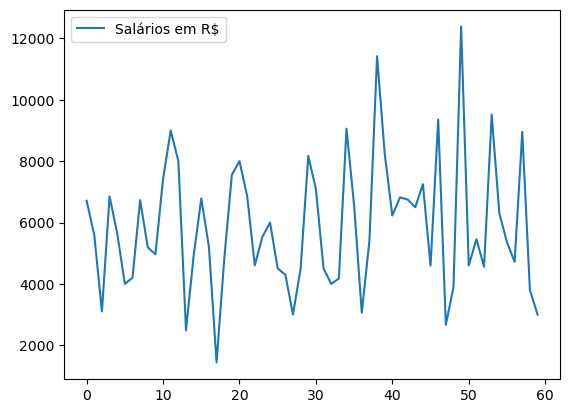

In [38]:
df_final_empresas.plot()